In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
import pingouin as pg
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as me
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedKFold 
from sklearn.linear_model import LinearRegression, LogisticRegression

In [412]:
# COMMON VARIABLES

alg_to_analyze = [
    'vader_sentiment_analysis_score',
    'vader_sentiment_analysis_polarity'
]

tpd_columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

In [413]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [414]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376,1040939562774790144,69734383,119897261
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷,Esdras Xavier,belle-🏴.dev || twitch.tv/bellesamways,Willian Justen
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha,esdras_xavieer,bellesamways,Willian_justen
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil","Jaraguá do Sul, Brasil",Curitiba,"Petrópolis, Brasil"
url,None,https://t.co/gX4oRZWHg3,https://t.co/KkaPlVH4Wu,https://t.co/hDni4Fh2Ng,https://t.co/YJQuDtv2YW,https://t.co/3yZ94QNQvs,https://t.co/MtUeSEBICu,https://t.co/QU71LJgSuD,None,https://t.co/AmkOKWlftK,https://t.co/JWBzdmQOcV,https://t.co/yPuEuh1bn9,https://t.co/Uhw9rEUK2v,None,None,https://t.co/9cS34v6hKc,https://t.co/H7Mzn0CEHR,https://t.co/bf6AeBboQk,https://t.co/23lnSqtqOj


In [415]:
tweets = []

for d in data:
    if data[d]['bigfive']:
        tweets.append(data[d]['tweets'])

final_tweets = []
for i in tweets:
    final_tweets.extend(i)
    
len(final_tweets)

79029

In [416]:
def clean_df(df, alg):
    clean_df_columns = [
    #     'text',
        'created_at',
        'id_user',
        'final_score',
        'final_polarity',
        'oplexicon_sentiment_analysis_score',
        'oplexicon_sentiment_analysis_polarity',
        'sentistrength_sentiment_analysis_score',
        'sentistrength_sentiment_analysis_polarity',
        'sentilexpt_sentiment_analysis_score',
        'sentilexpt_sentiment_analysis_polarity'
    ]
    if alg == 'oplexicon':
        clean_df_columns.remove('oplexicon_sentiment_analysis_score')
        clean_df_columns.remove('oplexicon_sentiment_analysis_polarity')
    elif alg == 'sentistrength':
        clean_df_columns.remove('sentistrength_sentiment_analysis_score')
        clean_df_columns.remove('sentistrength_sentiment_analysis_polarity')
    elif alg == 'sentilexpt':
        clean_df_columns.remove('sentilexpt_sentiment_analysis_score')
        clean_df_columns.remove('sentilexpt_sentiment_analysis_polarity')
        
    for c in clean_df_columns:
        del df[c]

In [417]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    del tweets_pd[19]
    del tweets_pd[20]
    
    tweets_pd.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
 
    return tweets_pd

In [418]:
# VADER X OPLEXICON
    
df = pd.DataFrame(final_tweets)

del df[0]
del df[1]
del df[4]
del df[5]
del df[6]
del df[18]
del df[19]
del df[20]

df.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

clean_df(df, 'oplexicon')

df['vader_prediction'] = df['vader_sentiment_analysis_polarity'].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))
df['oplexicon_prediction'] = df['oplexicon_sentiment_analysis_polarity'].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))

df['accuracy'] = df.apply(lambda x: 1 if x['vader_prediction'] == x['oplexicon_prediction'] else 0, axis=1)

df.head()

,text,vader_sentiment_analysis_score,vader_sentiment_analysis_polarity,oplexicon_sentiment_analysis_score,oplexicon_sentiment_analysis_polarity,vader_prediction,oplexicon_prediction,accuracy
0,"Atenção, estou mudando os moveis da sala de lu...",-0.4588,neg,0.000000,neu,-1,0,0
1,"@DouglasMarendaz Eu amo muito meu pai, mas fal...",-0.8720,neg,0.458831,pos,-1,1,0
2,@lilicebk Eu cresci numa casa cheia de gente e...,-0.6808,neg,0.000000,neu,-1,0,0
3,@lilicebk Mas até voltar a morar sozinha ano p...,-0.3291,neg,-0.250000,neg,-1,-1,1
4,@lilicebk Eu realmente não tenho questões quan...,0.2967,pos,0.458831,pos,1,1,1


In [419]:
def conf_matrix(x, col1, col2):
    if x[col1] == 1 and x[col2] == 1:
        return 'TP'
    elif x[col1] == 1 and x[col2] == -1:
        return 'FN'
    elif x[col1] == -1 and x[col2] == 1:
        return 'FP'
    elif x[col1] == -1 and x[col2] == -1:
        return 'TN'
    else:
        return 0

In [420]:
df['conf_matrix'] = df.apply(lambda x: conf_matrix(x, 'vader_prediction', 'oplexicon_prediction'), axis=1)

list_precision = []

conf_vals = df['conf_matrix'].value_counts().to_dict()
print(conf_vals)

accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
precision_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])

# ------------------------------------------------------
# verificar se devo incluir os NEUTROS também nas contas
# ------------------------------------------------------

recall_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
f1_score_pos = 2*precision_pos*recall_pos / (precision_pos + recall_pos)
print('-----------------')
print('VADER X OPLEXICON')
print('-----------------')
print('POSITIVE')
print('--------')
print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision_pos, 2),'%',
      '\nRecall: ', round(100 * recall_pos, 2),'%',
      '\nF1 Score: ', round(100 * f1_score_pos, 2),'%')

print('--------')
print('NEGATIVE')
print('--------')

precision_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FN'])
recall_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FP'])
f1_score_neg = 2*precision_neg*recall_neg / (precision_neg + recall_neg)

print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision_neg, 2),'%',
      '\nRecall: ', round(100 * recall_neg, 2),'%',
      '\nF1 Score: ', round(100 * f1_score_neg, 2),'%')

{0: 40676, 'TP': 16671, 'FP': 9766, 'TN': 7704, 'FN': 4212}
-----------------
VADER X OPLEXICON
-----------------
POSITIVE
--------
Accuracy:  63.55 % 
Precision:  63.06 % 
Recall:  79.83 % 
F1 Score:  70.46 %
--------
NEGATIVE
--------
Accuracy:  63.55 % 
Precision:  64.65 % 
Recall:  44.1 % 
F1 Score:  52.43 %


In [421]:
rdf = pd.DataFrame(columns=['Sentiment Lexicon', 'Accuracy', 'Precision - Positive', 
                            'Recall - Positive', 'F1-Score - Positive',
                            'Precision - Negative', 
                            'Recall - Negative', 'F1-Score - Negative'
                           ])
d = {
    'Sentiment Lexicon': 'OpLexicon',
    'Accuracy': accuracy,
    'Precision - Positive': precision_pos,
    'Recall - Positive': recall_pos,
    'F1-Score - Positive': f1_score_pos,
    'Precision - Negative': precision_neg,
    'Recall - Negative': recall_neg,
    'F1-Score - Negative': f1_score_neg
}
rdf = rdf.append(d, ignore_index=True)
rdf

,Sentiment Lexicon,Accuracy,Precision - Positive,Recall - Positive,F1-Score - Positive,Precision - Negative,Recall - Negative,F1-Score - Negative
0,OpLexicon,0.635544,0.630593,0.798305,0.704607,0.646526,0.440985,0.524331


In [422]:
# VADER X SENTISTRENGTH
    
df = pd.DataFrame(final_tweets)

del df[0]
del df[1]
del df[4]
del df[5]
del df[6]
del df[18]
del df[19]
del df[20]

df.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

clean_df(df, 'sentistrength')

df['vader_prediction'] = df['vader_sentiment_analysis_polarity'].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))
df['sentistrength_prediction'] = df['sentistrength_sentiment_analysis_polarity'].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))

df['accuracy'] = df.apply(lambda x: 1 if x['vader_prediction'] == x['sentistrength_prediction'] else 0, axis=1)

df.head()

,text,vader_sentiment_analysis_score,vader_sentiment_analysis_polarity,sentistrength_sentiment_analysis_score,sentistrength_sentiment_analysis_polarity,vader_prediction,sentistrength_prediction,accuracy
0,"Atenção, estou mudando os moveis da sala de lu...",-0.4588,neg,0.00,neu,-1,0,0
1,"@DouglasMarendaz Eu amo muito meu pai, mas fal...",-0.8720,neg,0.25,pos,-1,1,0
2,@lilicebk Eu cresci numa casa cheia de gente e...,-0.6808,neg,0.00,neu,-1,0,0
3,@lilicebk Mas até voltar a morar sozinha ano p...,-0.3291,neg,-0.25,neg,-1,-1,1
4,@lilicebk Eu realmente não tenho questões quan...,0.2967,pos,0.00,neu,1,0,0


In [423]:
df['conf_matrix'] = df.apply(lambda x: conf_matrix(x, 'vader_prediction', 'sentistrength_prediction'), axis=1)

conf_vals = df['conf_matrix'].value_counts().to_dict()
print(conf_vals)

accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
precision_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])
recall_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
f1_score_pos = 2*precision_pos*recall_pos / (precision_pos + recall_pos)
print('---------------------')
print('VADER X SENTISTRENGTH')
print('---------------------')
print('POSITIVE')
print('--------')
print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision_pos, 2),'%',
      '\nRecall: ', round(100 * recall_pos, 2),'%',
      '\nF1 Score: ', round(100 * f1_score_pos, 2),'%')

print('--------')
print('NEGATIVE')
print('--------')

precision_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FN'])
recall_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FP'])
f1_score_neg = 2*precision_neg*recall_neg / (precision_neg + recall_neg)

print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision_neg, 2),'%',
      '\nRecall: ', round(100 * recall_neg, 2),'%',
      '\nF1 Score: ', round(100 * f1_score_neg, 2),'%')

{0: 44247, 'TP': 15770, 'TN': 11299, 'FP': 4629, 'FN': 3084}
---------------------
VADER X SENTISTRENGTH
---------------------
POSITIVE
--------
Accuracy:  77.82 % 
Precision:  77.31 % 
Recall:  83.64 % 
F1 Score:  80.35 %
--------
NEGATIVE
--------
Accuracy:  77.82 % 
Precision:  78.56 % 
Recall:  70.94 % 
F1 Score:  74.55 %


In [424]:
d = {
    'Sentiment Lexicon': 'SentiStrength',
    'Accuracy': accuracy,
    'Precision - Positive': precision_pos,
    'Recall - Positive': recall_pos,
    'F1-Score - Positive': f1_score_pos,
    'Precision - Negative': precision_neg,
    'Recall - Negative': recall_neg,
    'F1-Score - Negative': f1_score_neg
}
rdf = rdf.append(d, ignore_index=True)
rdf

,Sentiment Lexicon,Accuracy,Precision - Positive,Recall - Positive,F1-Score - Positive,Precision - Negative,Recall - Negative,F1-Score - Negative
0,OpLexicon,0.635544,0.630593,0.798305,0.704607,0.646526,0.440985,0.524331
1,SentiStrength,0.778247,0.773077,0.836427,0.803505,0.785580,0.709380,0.745538


In [425]:
# VADER X SENTILEXPT

df = pd.DataFrame(final_tweets)

del df[0]
del df[1]
del df[4]
del df[5]
del df[6]
del df[18]
del df[19]
del df[20]

df.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

clean_df(df, 'sentilexpt')

df['vader_prediction'] = df['vader_sentiment_analysis_polarity'].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))
df['sentilexpt_prediction'] = df['sentilexpt_sentiment_analysis_polarity'].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))

df['accuracy'] = df.apply(lambda x: 1 if x['vader_prediction'] == x['sentilexpt_prediction'] else 0, axis=1)

df.head()

,text,vader_sentiment_analysis_score,vader_sentiment_analysis_polarity,sentilexpt_sentiment_analysis_score,sentilexpt_sentiment_analysis_polarity,vader_prediction,sentilexpt_prediction,accuracy
0,"Atenção, estou mudando os moveis da sala de lu...",-0.4588,neg,0.00,neu,-1,0,0
1,"@DouglasMarendaz Eu amo muito meu pai, mas fal...",-0.8720,neg,-0.25,neg,-1,-1,1
2,@lilicebk Eu cresci numa casa cheia de gente e...,-0.6808,neg,-0.25,neg,-1,-1,1
3,@lilicebk Mas até voltar a morar sozinha ano p...,-0.3291,neg,-0.25,neg,-1,-1,1
4,@lilicebk Eu realmente não tenho questões quan...,0.2967,pos,0.00,neu,1,0,0


In [426]:
df['conf_matrix'] = df.apply(lambda x: conf_matrix(x, 'vader_prediction', 'sentilexpt_prediction'), axis=1)

conf_vals = df['conf_matrix'].value_counts().to_dict()
print(conf_vals)

accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
precision_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])
recall_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
f1_score_pos = 2*precision_pos*recall_pos / (precision_pos + recall_pos)
print('------------------')
print('VADER X SENTILEXPT')
print('------------------')
print('POSITIVE')
print('--------')
print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision_pos, 2),'%',
      '\nRecall: ', round(100 * recall_pos, 2),'%',
      '\nF1 Score: ', round(100 * f1_score_pos, 2),'%')

print('--------')
print('NEGATIVE')
print('--------')

precision_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FN'])
recall_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FP'])
f1_score_neg = 2*precision_neg*recall_neg / (precision_neg + recall_neg)

print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision_neg, 2),'%',
      '\nRecall: ', round(100 * recall_neg, 2),'%',
      '\nF1 Score: ', round(100 * f1_score_neg, 2),'%')

{0: 44938, 'TP': 13413, 'TN': 10804, 'FP': 5340, 'FN': 4534}
------------------
VADER X SENTILEXPT
------------------
POSITIVE
--------
Accuracy:  71.04 % 
Precision:  71.52 % 
Recall:  74.74 % 
F1 Score:  73.1 %
--------
NEGATIVE
--------
Accuracy:  71.04 % 
Precision:  70.44 % 
Recall:  66.92 % 
F1 Score:  68.64 %


In [427]:
d = {
    'Sentiment Lexicon': 'Sentilex-PT',
    'Accuracy': accuracy,
    'Precision - Positive': precision_pos,
    'Recall - Positive': recall_pos,
    'F1-Score - Positive': f1_score_pos,
    'Precision - Negative': precision_neg,
    'Recall - Negative': recall_neg,
    'F1-Score - Negative': f1_score_neg
}
rdf = rdf.append(d, ignore_index=True)
rdf

,Sentiment Lexicon,Accuracy,Precision - Positive,Recall - Positive,F1-Score - Positive,Precision - Negative,Recall - Negative,F1-Score - Negative
0,OpLexicon,0.635544,0.630593,0.798305,0.704607,0.646526,0.440985,0.524331
1,SentiStrength,0.778247,0.773077,0.836427,0.803505,0.785580,0.709380,0.745538
2,Sentilex-PT,0.710363,0.715246,0.747367,0.730954,0.704394,0.669227,0.686360


In [428]:
def create_data():
    bar_chart_data = []

    count = 1
    for i in data:
        if data[i]['bigfive']:
            tweets = create_tweets_pd(data, i)

            d = ['P{}'.format(count),
                 len(tweets.query("final_polarity == 'pos'")),
                 len(tweets.query("final_polarity == 'neu'")), 
                 len(tweets.query("final_polarity == 'neg'")),
                 (len(tweets.query("final_polarity == 'pos'")) / len(tweets)) * 100,
                 (len(tweets.query("final_polarity == 'neu'")) / len(tweets)) * 100,
                 (len(tweets.query("final_polarity == 'neg'")) / len(tweets)) * 100,
                 data[i]['bigfive'][0][1],
                 data[i]['bigfive'][0][2],
                 data[i]['bigfive'][0][3],
                 data[i]['bigfive'][0][4],
                 data[i]['bigfive'][0][5]
                ]
            bar_chart_data.append(d)
            count += 1

    df = pd.DataFrame(bar_chart_data, columns=[
        "Participant","pos", "neu", "neg", 
        "por_pos","por_neu","por_neg", "O", "C", "E", "A", "N"])
    
    biglist = ['O', 'C', 'E', 'A', 'N']
    for b in biglist:
        res = []
        for r in df[b]:
            if r <= 10:
                res.append(1)
            elif r > 10 and r < 21:
                res.append(2)
            elif r > 20 and r < 31:
                res.append(3)
            elif r > 30 and r < 41:
                res.append(4)
            elif r > 40:
                res.append(5)
        
        df['{}_Coded'.format(b)] = res
    
    return df

In [429]:
df = create_data()

In [430]:
df

,Participant,pos,neu,neg,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,P1,1814,683,2072,39.702342,14.948566,45.349092,37,43,36,24,26,4,5,4,3,3
1,P2,1927,698,1751,44.035649,15.950640,40.013711,41,43,34,22,23,5,5,4,3,3
2,P3,2732,590,2506,46.877145,10.123542,42.999314,43,46,31,24,15,5,5,4,3,2
3,P4,1711,315,678,63.276627,11.649408,25.073964,17,33,33,22,39,2,4,4,3,4
4,P5,3028,422,1967,55.898099,7.790290,36.311612,22,33,31,20,8,3,4,4,2,1
5,P6,5454,755,2984,59.327749,8.212771,32.459480,39,49,39,28,15,4,5,4,3,2
6,P7,821,155,457,57.292394,10.816469,31.891137,35,35,32,26,16,4,4,4,3,2
7,P8,1002,414,794,45.339367,18.733032,35.927602,29,45,34,35,29,3,5,4,4,3
8,P9,4281,650,1520,66.361804,10.075957,23.562238,40,46,38,22,21,4,5,4,3,3
9,P10,2292,304,1962,50.285213,6.669592,43.045195,32,46,19,18,28,4,5,2,2,3


In [431]:
type(df['C'])

pandas.core.series.Series

In [432]:
print(list(df['A']))

[24, 22, 24, 22, 20, 28, 26, 35, 22, 18, 33, 31, 22, 23, 27, 20]


In [433]:
pg.normality(df)

,W,pval,normal
pos,0.878574,0.036872,False
neu,0.542971,0.000005,False
neg,0.749895,0.000633,False
por_pos,0.954516,0.564416,True
por_neu,0.867491,0.024900,False
por_neg,0.948865,0.471920,True
O,0.949463,0.481232,True
C,0.868218,0.025544,False
E,0.959798,0.658125,True
A,0.921497,0.178298,True


In [434]:
pg.homoscedasticity(df)

,W,pval,equal_var
levene,0.919647,0.542863,True


In [435]:
pg.anova(dv='pos', between=['O'], data=df).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,O,12,3,0.261,0.961,0.511


In [436]:
pg.anova(dv='pos', between=['E'], data=df).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,E,11,4,0.708,0.707,0.661


In [437]:
pg.anova(dv='pos', between=['O', 'A'], data=df).round(3)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1069: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1070: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac2 = ms_fac2 / ms_resid
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1071: RuntimeWarning: divide by zero encountered in double_scalars
  fval_inter = ms_inter / ms_resid


,Source,SS,DF,MS,F,np2
0,O,2.061828e+07,12,1718189.745,-inf,1.0
1,A,3.522396e+07,10,3522395.994,-inf,1.0
2,O * A,-1.548994e+07,120,-129082.849,inf,1.0
3,Residual,0.000000e+00,-127,-0.000,NaN,NaN


In [438]:
pg.anova(dv='pos', between=['O', 'N'], data=df).round(3)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1069: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1070: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac2 = ms_fac2 / ms_resid
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1071: RuntimeWarning: divide by zero encountered in double_scalars
  fval_inter = ms_inter / ms_resid


,Source,SS,DF,MS,F,np2
0,O,2.061828e+07,12,1718189.745,-inf,1.0
1,N,2.880890e+07,11,2618990.494,-inf,1.0
2,O * N,-9.074877e+06,132,-68749.071,inf,1.0
3,Residual,0.000000e+00,-140,-0.000,NaN,NaN


In [439]:
stats.f_oneway(df['pos'], df['O'])

F_onewayResult(statistic=35.62710789854303, pvalue=1.5211908063006258e-06)

In [440]:
model = ols('pos ~ O + C + E + A + N', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O,1.557687e+06,1.0,0.562795,0.470419
C,3.769323e+06,1.0,1.361864,0.270289
E,5.160861e+06,1.0,1.864629,0.202018
A,3.650482e+06,1.0,1.318926,0.277514
N,9.103297e+05,1.0,0.328904,0.578974
Residual,2.767768e+07,10.0,NaN,NaN


In [441]:
model = ols('neg ~ O + C + E + A + N', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O,1.489263e+06,1.0,0.722013,0.415364
C,4.684080e+06,1.0,2.270898,0.162744
E,1.741266e+06,1.0,0.844187,0.379830
A,1.332195e+06,1.0,0.645864,0.440280
N,1.149254e+05,1.0,0.055717,0.818162
Residual,2.062655e+07,10.0,NaN,NaN


In [442]:
model = ols('por_pos ~ O + C + E + A + N', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O,7.610110,1.0,0.062603,0.807494
C,210.856454,1.0,1.734558,0.217210
E,55.733984,1.0,0.458482,0.513693
A,75.193784,1.0,0.618563,0.449818
N,9.131895,1.0,0.075121,0.789599
Residual,1215.620681,10.0,NaN,NaN


In [443]:
model = ols('por_neg ~ O + C + E + A + N', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O,5.082576,1.0,0.099379,0.759056
C,130.653926,1.0,2.554659,0.141053
E,47.369953,1.0,0.926219,0.358542
A,19.586205,1.0,0.382967,0.549856
N,2.925381,1.0,0.057200,0.815809
Residual,511.433887,10.0,NaN,NaN


In [444]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['O'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower      upper    reject
----------------------------------------------------------
    17     22   1317.0   0.9 -24724.8319 27358.8319  False
    17     29    759.0   0.9 -19828.8758 21346.8758  False
    17     30   1435.0   0.9 -24606.8319 27476.8319  False
    17     31    215.0   0.9 -25826.8319 26256.8319  False
    17     32    581.0   0.9 -25460.8319 26622.8319  False
    17     35   -890.0   0.9 -26931.8319 25151.8319  False
    17     36  -1044.0   0.9 -27085.8319 24997.8319  False
    17     37    103.0   0.9 -25938.8319 26144.8319  False
    17     39   3743.0   0.9 -22298.8319 29784.8319  False
    17     40   2570.0   0.9 -23471.8319 28611.8319  False
    17     41    216.0   0.9 -25825.8319 26257.8319  False
    17     43   1021.0   0.9 -25020.8319 27062.8319  False
    22     29   -558.0   0.9 -21145.8758 20029.8758  False
    22     30    118.0   0.9 -25923.8319 26159.8319  Fal

In [445]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['C'], alpha=0.05)
print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff p-adj     lower      upper    reject
------------------------------------------------------------
    33     35    -386.0    0.9  -7550.0554  6778.0554  False
    33     36    -443.5    0.9  -9217.6401  8330.6401  False
    33     41    -650.5    0.9  -9424.6401  8123.6401  False
    33     43    -828.5    0.9  -7368.3579  5711.3579  False
    33     45  279.1667    0.9  -6260.6912  6819.0245  False
    33     46  732.1667    0.9  -5807.6912  7272.0245  False
    33     49    3084.5 0.8263  -5689.6401 11858.6401  False
    35     36     -57.5    0.9  -8831.6401  8716.6401  False
    35     41    -264.5    0.9  -9038.6401  8509.6401  False
    35     43    -442.5    0.9  -6982.3579  6097.3579  False
    35     45  665.1667    0.9  -5874.6912  7205.0245  False
    35     46 1118.1667    0.9  -5421.6912  7658.0245  False
    35     49    3470.5 0.7419  -5303.6401 12244.6401  False
    36     41    -207.0 

In [446]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['E'], alpha=0.05)
print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
    19     24      854.0    0.9  -14333.056  16041.056  False
    19     25     -366.0    0.9  -15553.056  14821.056  False
    19     27    -1410.0    0.9  -16597.056  13777.056  False
    19     28     -573.0    0.9  -15760.056  14614.056  False
    19     31  -149.6667    0.9  -12549.846 12250.5126  False
    19     32    -1471.0    0.9  -16658.056  13716.056  False
    19     33     -581.0    0.9  -15768.056  14606.056  False
    19     34     -827.5    0.9 -13979.8763 12324.8763  False
    19     36     1753.5    0.9 -11398.8763 14905.8763  False
    19     38     1989.0    0.9  -13198.056  17176.056  False
    19     39     3162.0    0.9  -12025.056  18349.056  False
    24     25    -1220.0    0.9  -16407.056  13967.056  False
    24     27    -2264.0    0.9  -17451.056  12923.056  False
    24  

In [447]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['N'], alpha=0.05)
print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj     lower      upper    reject
-----------------------------------------------------------
     8     15    778.0    0.9 -11720.8209 13276.8209  False
     8     16  -1510.0    0.9 -15942.3953 12922.3953  False
     8     19  -1240.0    0.9 -15672.3953 13192.3953  False
     8     21   -719.0    0.9 -13217.8209 11779.8209  False
     8     23   -216.0    0.9 -14648.3953 14216.3953  False
     8     26    105.0    0.9 -14327.3953 14537.3953  False
     8     28   -207.0    0.9 -12705.8209 12291.8209  False
     8     29  -1173.0    0.9 -15605.3953 13259.3953  False
     8     32   1880.0    0.9 -10618.8209 14378.8209  False
     8     35   -859.0    0.9 -15291.3953 13573.3953  False
     8     39  -1289.0    0.9 -15721.3953 13143.3953  False
    15     16  -2288.0    0.9 -14786.8209 10210.8209  False
    15     19  -2018.0    0.9 -14516.8209 10480.8209  False
    15     21  -1497.0    0.9 -11702.244

In [448]:
model = ols(formula='pos ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O_Coded,2.301418e+04,1.0,0.007821,0.931276
C_Coded,1.623872e+06,1.0,0.551844,0.474654
E_Coded,4.848900e+06,1.0,1.647814,0.228203
A_Coded,8.360591e+06,1.0,2.841200,0.122775
N_Coded,9.445256e+05,1.0,0.320980,0.583510
Residual,2.942626e+07,10.0,NaN,NaN


In [449]:
model = ols('neg ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O_Coded,2.520245e+01,1.0,0.000013,0.997216
C_Coded,4.040918e+06,1.0,2.052503,0.182467
E_Coded,2.700276e+06,1.0,1.371551,0.268695
A_Coded,4.329783e+06,1.0,2.199226,0.168896
N_Coded,9.529166e+05,1.0,0.484015,0.502457
Residual,1.968776e+07,10.0,NaN,NaN


In [450]:
model = ols('por_pos ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O_Coded,23.938230,1.0,0.262236,0.619706
C_Coded,504.574914,1.0,5.527470,0.040567
E_Coded,25.835027,1.0,0.283015,0.606348
A_Coded,114.976877,1.0,1.259538,0.287962
N_Coded,16.905878,1.0,0.185199,0.676070
Residual,912.849613,10.0,NaN,NaN


In [451]:
model = ols('por_neg ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O_Coded,0.244444,1.0,0.005889,0.940344
C_Coded,221.456985,1.0,5.335212,0.043522
E_Coded,19.419413,1.0,0.467841,0.509521
A_Coded,23.011221,1.0,0.554373,0.473671
N_Coded,8.558618,1.0,0.206189,0.659467
Residual,415.085628,10.0,NaN,NaN


In [452]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['O_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower      upper   reject
---------------------------------------------------------
     2      3  964.6667   0.9 -4852.9089 6782.2422  False
     2      4     754.0   0.9 -5003.9065 6511.9065  False
     2      5     618.5   0.9 -5978.0106 7215.0106  False
     3      4 -210.6667   0.9 -3207.1762 2785.8429  False
     3      5 -346.1667   0.9 -4743.8404 4051.5071  False
     4      5    -135.5   0.9 -4453.9299 4182.9299  False
---------------------------------------------------------


In [453]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['C_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     4      5 514.2364 0.5882 -1427.4777 2455.9504  False
---------------------------------------------------------


In [454]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['E_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     2      3  -373.75    0.9 -5452.4622 4704.9622  False
     2      4 409.2727    0.9 -4335.2538 5153.7993  False
     3      4 783.0227 0.7118 -1869.2482 3435.2937  False
---------------------------------------------------------


In [455]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['A_Coded'], alpha=0.05)
print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     2      3      -60.2    0.9 -2881.2075 2760.8075  False
     2      4 -1623.6667 0.4617 -5122.6958 1875.3625  False
     3      4 -1563.4667   0.34 -4384.4741 1257.5408  False
-----------------------------------------------------------


In [456]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['N_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     1      2    -609.5    0.9 -6526.0294 5307.0294  False
     1      3 -890.7143    0.9 -6547.9985 4766.5699  False
     1      4     -24.0    0.9 -5940.5294 5892.5294  False
     2      3 -281.2143    0.9 -3598.0912 3035.6626  False
     2      4     585.5    0.9 -3156.4418 4327.4418  False
     3      4  866.7143 0.8542 -2450.1626 4183.5912  False
----------------------------------------------------------


In [457]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['O_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     2      3 1508.8333 0.7625 -3218.0693  6235.736  False
     2      4  850.2857    0.9 -3828.1346  5528.706  False
     2      5    1450.5 0.8394 -3909.3038 6810.3038  False
     3      4 -658.5476 0.8396 -3093.2747 1776.1795  False
     3      5  -58.3333    0.9 -3631.5359 3514.8692  False
     4      5  600.2143    0.9 -2908.6009 4109.0295  False
----------------------------------------------------------


In [458]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['C_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     4      5 1021.8545 0.1811 -535.3061 2579.0152  False
---------------------------------------------------------


In [459]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['E_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     2      3  -702.75    0.9 -4987.3685 3581.8685  False
     2      4  15.7273    0.9 -3986.9579 4018.4125  False
     3      4 718.4773 0.6733 -1519.0918 2956.0463  False
---------------------------------------------------------


In [460]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['A_Coded'], alpha=0.05)
print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     2      3   318.6333    0.9 -2104.1903  2741.457  False
     2      4  -942.3333 0.6845 -3947.4763 2062.8096  False
     3      4 -1260.9667 0.3833 -3683.7903  1161.857  False
-----------------------------------------------------------


In [461]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['N_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     1      2   -298.5    0.9 -5278.7434 4681.7434  False
     1      3   -448.0    0.9 -5210.0236 4314.0236  False
     1      4    403.0    0.9 -4577.2434 5383.2434  False
     2      3   -149.5    0.9 -2941.4838 2642.4838  False
     2      4    701.5    0.9 -2448.2825 3851.2825  False
     3      4    851.0 0.7853 -1940.9838 3642.9838  False
---------------------------------------------------------


In [462]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['O_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3 -15.7931 0.5488  -50.561 18.9749  False
     2      4 -11.5575 0.7361 -45.9688 22.8538  False
     2      5 -17.8202 0.5523 -57.2433 21.6029  False
     3      4   4.2355 0.8934 -13.6727 22.1437  False
     3      5  -2.0272    0.9 -28.3092 24.2549  False
     4      5  -6.2627 0.8837 -32.0712 19.5458  False
-----------------------------------------------------


In [463]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['C_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     4      5 -13.6704 0.0109 -23.6601 -3.6807   True
-----------------------------------------------------


In [464]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['E_Coded'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     2      3  -0.3149   0.9 -33.9198 33.2901  False
     2      4  -0.1981   0.9 -31.5918 31.1956  False
     3      4   0.1167   0.9 -17.4329 17.6663  False
----------------------------------------------------


In [465]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['A_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3  -7.1227 0.5769 -25.5762 11.3307  False
     2      4 -11.9641 0.3803 -34.8528 10.9246  False
     3      4  -4.8413 0.7606 -23.2948 13.6121  False
-----------------------------------------------------


In [466]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['N_Coded'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     1      2  -6.9487   0.9 -45.7689 31.8715  False
     1      3  -6.5231   0.9 -43.6423 30.5961  False
     1      4  -4.9471   0.9 -43.7673 33.8731  False
     2      3   0.4256   0.9 -21.3374 22.1887  False
     2      4   2.0016   0.9 -22.5505 26.5536  False
     3      4   1.5759   0.9 -20.1871  23.339  False
----------------------------------------------------


In [467]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['O_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3  12.5114  0.334  -8.4977 33.5205  False
     2      4   9.2515 0.5635 -11.5422 30.0451  False
     2      5  16.4325 0.2247  -7.3896 40.2547  False
     3      4  -3.2599 0.7909 -14.0813  7.5614  False
     3      5   3.9212  0.877 -11.9603 19.8026  False
     4      5   7.1811 0.5389  -8.4142 22.7763  False
-----------------------------------------------------


In [468]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['C_Coded'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     4      5   8.3974 0.0194 1.5746 15.2201   True
---------------------------------------------------


In [469]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['E_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3  -7.7078 0.6115 -28.9597  13.544  False
     2      4  -7.6377 0.5788 -27.4912 12.2158  False
     3      4   0.0701    0.9 -11.0283 11.1686  False
-----------------------------------------------------


In [470]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['A_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3   0.6908    0.9 -12.0929 13.4745  False
     2      4   -2.629    0.9 -18.4853 13.2272  False
     3      4  -3.3198 0.7646 -16.1035  9.4639  False
-----------------------------------------------------


In [471]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['N_Coded'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     1      2  -0.6727   0.9  -26.412 25.0667  False
     1      3   0.2255   0.9 -24.3861  24.837  False
     1      4   -1.499   0.9 -27.2384 24.2403  False
     2      3   0.8981   0.9 -13.5316 15.3279  False
     2      4  -0.8264   0.9 -17.1054 15.4526  False
     3      4  -1.7245   0.9 -16.1543 12.7053  False
----------------------------------------------------


In [472]:
pg.ttest(df['pos'], df['O'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,5.968845,30,two-sided,0.000002,"[1610.07, 3284.93]",2.110305,8252.772,0.99993


In [473]:
pg.ttest(df['pos'], df['C'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,5.946766,30,two-sided,0.000002,"[1601.02, 3275.86]",2.102499,7809.05,0.999924


In [474]:
pg.ttest(df['pos'], df['E'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,5.972067,30,two-sided,0.000002,"[1611.39, 3286.23]",2.111445,8319.606,0.999931


In [475]:
pg.ttest(df['pos'], df['A'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,5.987468,30,two-sided,0.000001,"[1617.7, 3292.55]",2.11689,8646.607,0.999935


In [476]:
pg.ttest(df['pos'], df['N'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,5.98894,30,two-sided,0.000001,"[1618.32, 3293.18]",2.11741,8678.523,0.999936


In [477]:
print(pg.mwu(df['pos'], df['O']))
print(pg.mwu(df['neg'], df['O']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0


In [478]:
print(pg.mwu(df['pos'], df['C']))
print(pg.mwu(df['neg'], df['C']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000001 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000001 -1.0   1.0


In [479]:
print(pg.mwu(df['pos'], df['E']))
print(pg.mwu(df['neg'], df['E']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0


In [480]:
print(pg.mwu(df['pos'], df['A']))
print(pg.mwu(df['neg'], df['A']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0


In [481]:
print(pg.mwu(df['pos'], df['N']))
print(pg.mwu(df['neg'], df['N']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0


In [482]:
print(pg.mwu(df['por_pos'], df['O']))
print(pg.mwu(df['por_neg'], df['O']))

     U-val       tail     p-val       RBC      CLES
MWU  238.0  two-sided  0.000036 -0.859375  0.929688
     U-val       tail     p-val   RBC   CLES
MWU  160.0  two-sided  0.234719 -0.25  0.625


In [483]:
print(pg.mwu(df['por_pos'], df['C']))
print(pg.mwu(df['por_neg'], df['C']))

     U-val       tail    p-val       RBC      CLES
MWU  187.0  two-sided  0.02727 -0.460938  0.730469
     U-val       tail     p-val       RBC      CLES
MWU   67.0  two-sided  0.022424  0.476562  0.261719


In [484]:
print(pg.mwu(df['por_pos'], df['E']))
print(pg.mwu(df['por_neg'], df['E']))

     U-val       tail     p-val       RBC      CLES
MWU  245.0  two-sided  0.000011 -0.914062  0.957031
     U-val       tail     p-val       RBC      CLES
MWU  181.0  two-sided  0.047731 -0.414062  0.707031


In [485]:
print(pg.mwu(df['por_pos'], df['A']))
print(pg.mwu(df['por_neg'], df['A']))

     U-val       tail     p-val       RBC      CLES
MWU  254.0  two-sided  0.000002 -0.984375  0.992188
     U-val       tail     p-val     RBC     CLES
MWU  232.0  two-sided  0.000094 -0.8125  0.90625


In [486]:
print(pg.mwu(df['por_pos'], df['N']))
print(pg.mwu(df['por_neg'], df['N']))

     U-val       tail     p-val       RBC      CLES
MWU  253.0  two-sided  0.000003 -0.976562  0.988281
     U-val       tail     p-val       RBC      CLES
MWU  221.0  two-sided  0.000488 -0.726562  0.863281


In [487]:
print(pg.kruskal(data=df, dv='pos', between='O'))
print(pg.kruskal(data=df, dv='pos', between='O_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='O'))
print(pg.kruskal(data=df, dv='por_pos', between='O_Coded'))
print(pg.kruskal(data=df, dv='neg', between='O'))
print(pg.kruskal(data=df, dv='neg', between='O_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='O'))
print(pg.kruskal(data=df, dv='por_neg', between='O_Coded'))

        Source  ddof1          H     p-unc
Kruskal      O     12  10.290441  0.590497
          Source  ddof1         H     p-unc
Kruskal  O_Coded      3  0.844538  0.838787
        Source  ddof1          H     p-unc
Kruskal      O     12  14.426471  0.274307
          Source  ddof1         H     p-unc
Kruskal  O_Coded      3  2.194328  0.533066
        Source  ddof1          H     p-unc
Kruskal      O     12  11.349265  0.499247
          Source  ddof1         H    p-unc
Kruskal  O_Coded      3  3.088235  0.37822
        Source  ddof1          H    p-unc
Kruskal      O     12  13.819853  0.31236
          Source  ddof1        H     p-unc
Kruskal  O_Coded      3  3.47584  0.323909


In [488]:
print(pg.kruskal(data=df, dv='pos', between='C'))
print(pg.kruskal(data=df, dv='pos', between='C_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='C'))
print(pg.kruskal(data=df, dv='por_pos', between='C_Coded'))
print(pg.kruskal(data=df, dv='neg', between='C'))
print(pg.kruskal(data=df, dv='neg', between='C_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='C'))
print(pg.kruskal(data=df, dv='por_neg', between='C_Coded'))

        Source  ddof1         H     p-unc
Kruskal      C      7  4.485294  0.722487
          Source  ddof1         H     p-unc
Kruskal  C_Coded      1  0.080214  0.777008
        Source  ddof1          H     p-unc
Kruskal      C      7  11.595588  0.114667
          Source  ddof1         H     p-unc
Kruskal  C_Coded      1  4.880214  0.027166
        Source  ddof1    H     p-unc
Kruskal      C      7  5.5  0.599184
          Source  ddof1         H     p-unc
Kruskal  C_Coded      1  3.083422  0.079094
        Source  ddof1         H     p-unc
Kruskal      C      7  7.977941  0.334543
          Source  ddof1         H     p-unc
Kruskal  C_Coded      1  4.880214  0.027166


In [489]:
print(pg.kruskal(data=df, dv='pos', between='E'))
print(pg.kruskal(data=df, dv='pos', between='E_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='E'))
print(pg.kruskal(data=df, dv='por_pos', between='E_Coded'))
print(pg.kruskal(data=df, dv='neg', between='E'))
print(pg.kruskal(data=df, dv='neg', between='E_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='E'))
print(pg.kruskal(data=df, dv='por_neg', between='E_Coded'))

        Source  ddof1         H     p-unc
Kruskal      E     11  9.397059  0.585292
          Source  ddof1         H     p-unc
Kruskal  E_Coded      2  0.300802  0.860363
        Source  ddof1          H     p-unc
Kruskal      E     11  12.985294  0.294288
          Source  ddof1         H     p-unc
Kruskal  E_Coded      2  0.023061  0.988535
        Source  ddof1          H     p-unc
Kruskal      E     11  10.977941  0.445113
          Source  ddof1         H    p-unc
Kruskal  E_Coded      2  0.897393  0.63846
        Source  ddof1       H     p-unc
Kruskal      E     11  13.625  0.254442
          Source  ddof1         H     p-unc
Kruskal  E_Coded      2  1.427807  0.489729


In [490]:
print(pg.kruskal(data=df, dv='pos', between='A'))
print(pg.kruskal(data=df, dv='pos', between='A_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='A'))
print(pg.kruskal(data=df, dv='por_pos', between='A_Coded'))
print(pg.kruskal(data=df, dv='neg', between='A'))
print(pg.kruskal(data=df, dv='neg', between='A_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='A'))
print(pg.kruskal(data=df, dv='por_neg', between='A_Coded'))

        Source  ddof1          H     p-unc
Kruskal      A     10  12.463235  0.255249
          Source  ddof1         H     p-unc
Kruskal  A_Coded      2  3.664706  0.160037
        Source  ddof1         H     p-unc
Kruskal      A     10  9.805147  0.457752
          Source  ddof1         H     p-unc
Kruskal  A_Coded      2  1.701471  0.427101
        Source  ddof1          H     p-unc
Kruskal      A     10  12.716912  0.239933
          Source  ddof1         H     p-unc
Kruskal  A_Coded      2  3.335294  0.188691
        Source  ddof1          H     p-unc
Kruskal      A     10  10.389706  0.406994
          Source  ddof1         H     p-unc
Kruskal  A_Coded      2  0.783824  0.675764


In [491]:
print(pg.kruskal(data=df, dv='pos', between='N'))
print(pg.kruskal(data=df, dv='pos', between='N_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='N'))
print(pg.kruskal(data=df, dv='por_pos', between='N_Coded'))
print(pg.kruskal(data=df, dv='neg', between='N'))
print(pg.kruskal(data=df, dv='neg', between='N_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='N'))
print(pg.kruskal(data=df, dv='por_neg', between='N_Coded'))

        Source  ddof1          H     p-unc
Kruskal      N     11  13.301471  0.274079
          Source  ddof1         H     p-unc
Kruskal  N_Coded      3  0.929622  0.818274
        Source  ddof1       H     p-unc
Kruskal      N     11  10.875  0.453794
          Source  ddof1         H     p-unc
Kruskal  N_Coded      3  0.149685  0.985271
        Source  ddof1          H     p-unc
Kruskal      N     11  12.904412  0.299619
          Source  ddof1         H     p-unc
Kruskal  N_Coded      3  0.652311  0.884359
        Source  ddof1          H     p-unc
Kruskal      N     11  11.580882  0.395956
          Source  ddof1         H     p-unc
Kruskal  N_Coded      3  0.282038  0.963371


In [492]:
model = ols('por_pos ~ O + C + E + A + N', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.7746
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.589
Time:                        23:12:18   Log-Likelihood:                -57.346
No. Observations:                  16   AIC:                             126.7
Df Residuals:                      10   BIC:                             131.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.5646     29.179      3.104      0.011      25.549     155.580
O              0.1616      0.646      0.250      0.807      -1.278       1.601
C             -1.0383      0.788     -1.317      0.217      -2.795       0.718
E              0.3919      0.579      0.677      0.514      -0.898       1.681
A             -0.4877      0.620     -0.786      0.450      -1.869       0.894
N             -0.1135      0.414     -0.274      0.790      -1.036       0.809
==============================================================================
Omnibus:                        2.636   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.158
Skew:                           0.197   Prob(JB):                        0.560
Kurtosis:                       1.743   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '% Positive')

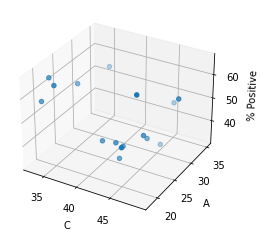

In [493]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = df["C"]
x2 = df["A"]
y = df['por_pos']
ax.scatter(x1, x2, y, marker='o')
# Set axis labels
ax.set_xlabel('C')
ax.set_ylabel('A')
ax.set_zlabel('% Positive')

In [494]:
model = ols('por_neg ~ O + C + E + A + N', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.8523
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.544
Time:                        23:12:18   Log-Likelihood:                -50.420
No. Observations:                  16   AIC:                             112.8
Df Residuals:                      10   BIC:                             117.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2093     18.926      1.332      0.212     -16.961      67.380
O             -0.1321      0.419     -0.315      0.759      -1.066       0.802
C              0.8173      0.511      1.598      0.141      -0.322       1.957
E             -0.3613      0.375     -0.962      0.359      -1.198       0.475
A             -0.2489      0.402     -0.619      0.550      -1.145       0.647
N             -0.0642      0.269     -0.239      0.816      -0.663       0.534
==============================================================================
Omnibus:                        1.334   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                0.498
Skew:                          -0.431   Prob(JB):                        0.780
Kurtosis:                       3.066   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '% Negative')

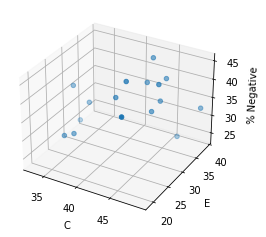

In [495]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = df["C"]
x2 = df["E"]
y = df['por_neg']
ax.scatter(x1, x2, y, marker='o')
# Set axis labels
ax.set_xlabel('C')
ax.set_ylabel('E')
ax.set_zlabel('% Negative')

In [496]:
model = ols('por_pos ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.695
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.223
Time:                        23:12:19   Log-Likelihood:                -55.055
No. Observations:                  16   AIC:                             122.1
Df Residuals:                      10   BIC:                             126.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.7113     31.423      3.460      0.006      38.697     178.726
O_Coded        1.9632      3.834      0.512      0.620      -6.579      10.505
C_Coded      -13.7296      5.840     -2.351      0.041     -26.741      -0.718
E_Coded        2.4301      4.568      0.532      0.606      -7.748      12.608
A_Coded       -4.8310      4.305     -1.122      0.288     -14.422       4.760
N_Coded        1.4900      3.462      0.430      0.676      -6.224       9.204
==============================================================================
Omnibus:                        4.539   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                2.506
Skew:                           0.952   Prob(JB):                        0.286
Kurtosis:                       3.362   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [497]:
model = ols('por_pos ~ O_Coded + C_Coded + E_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     2.238
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.131
Time:                        23:12:19   Log-Likelihood:                -55.202
No. Observations:                  16   AIC:                             120.4
Df Residuals:                      11   BIC:                             124.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.8545     26.936      4.264      0.001      55.568     174.141
O_Coded        1.1278      3.181      0.355      0.730      -5.874       8.129
C_Coded      -13.1039      5.442     -2.408      0.035     -25.082      -1.125
E_Coded        1.7182      4.097      0.419      0.683      -7.300      10.736
A_Coded       -4.5587      4.097     -1.113      0.290     -13.576       4.459
==============================================================================
Omnibus:                        4.579   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                2.445
Skew:                           0.931   Prob(JB):                        0.295
Kurtosis:                       3.451   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [498]:
model = ols('por_pos ~ C_Coded + E_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     3.173
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0636
Time:                        23:12:19   Log-Likelihood:                -55.293
No. Observations:                  16   AIC:                             118.6
Df Residuals:                      12   BIC:                             121.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.2030     25.919      4.445      0.001      58.730     171.676
C_Coded      -12.4210      4.901     -2.534      0.026     -23.100      -1.742
E_Coded        1.8386      3.931      0.468      0.648      -6.727      10.405
A_Coded       -4.5247      3.944     -1.147      0.274     -13.118       4.068
==============================================================================
Omnibus:                        4.577   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                2.379
Skew:                           0.909   Prob(JB):                        0.304
Kurtosis:                       3.516   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [499]:
model = ols('por_pos ~ C_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     4.948
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0252
Time:                        23:12:19   Log-Likelihood:                -55.437
No. Observations:                  16   AIC:                             116.9
Df Residuals:                      13   BIC:                             119.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.5198     22.582      5.337      0.000      71.734     169.306
C_Coded      -12.5381      4.745     -2.642      0.020     -22.790      -2.286
A_Coded       -3.8924      3.592     -1.084      0.298     -11.652       3.867
==============================================================================
Omnibus:                        6.373   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                3.510
Skew:                           1.056   Prob(JB):                        0.173
Kurtosis:                       3.898   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [500]:
model = ols('por_pos ~ C_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     8.614
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0109
Time:                        23:12:19   Log-Likelihood:                -56.129
No. Observations:                  16   AIC:                             116.3
Df Residuals:                      14   BIC:                             117.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.1505     21.939      5.203      0.000      67.095     161.205
C_Coded      -13.6704      4.658     -2.935      0.011     -23.660      -3.681
==============================================================================
Omnibus:                        5.077   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                2.539
Skew:                           0.890   Prob(JB):                        0.281
Kurtosis:                       3.798   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '% Positive')

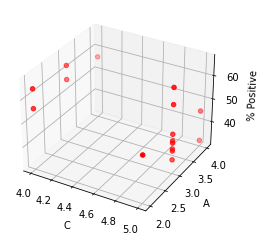

In [501]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = df["C_Coded"]
x2 = df["A_Coded"]
y = df['por_pos']
ax.scatter(x1, x2, y, c='r', marker='o')
# Set axis labels
ax.set_xlabel('C')
ax.set_ylabel('A')
ax.set_zlabel('% Positive')

In [502]:
model = ols('por_neg ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     1.514
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.269
Time:                        23:12:19   Log-Likelihood:                -48.750
No. Observations:                  16   AIC:                             109.5
Df Residuals:                      10   BIC:                             114.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6809     21.189      0.457      0.658     -37.531      56.893
O_Coded        0.1984      2.585      0.077      0.940      -5.562       5.958
C_Coded        9.0957      3.938      2.310      0.044       0.322      17.870
E_Coded       -2.1069      3.080     -0.684      0.510      -8.970       4.756
A_Coded       -2.1612      2.903     -0.745      0.474      -8.629       4.306
N_Coded       -1.0601      2.335     -0.454      0.659      -6.262       4.142
==============================================================================
Omnibus:                        8.415   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                5.035
Skew:                          -1.129   Prob(JB):                       0.0807
Kurtosis:                       4.565   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [503]:
model = ols('por_neg ~ C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     2.079
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.152
Time:                        23:12:19   Log-Likelihood:                -48.755
No. Observations:                  16   AIC:                             107.5
Df Residuals:                      11   BIC:                             111.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1005     19.524      0.517      0.615     -32.872      53.074
C_Coded        9.2232      3.406      2.708      0.020       1.728      16.719
E_Coded       -2.1345      2.918     -0.732      0.480      -8.556       4.287
A_Coded       -2.1402      2.756     -0.777      0.454      -8.206       3.926
N_Coded       -1.1509      1.920     -0.599      0.561      -5.377       3.075
==============================================================================
Omnibus:                        8.158   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                4.811
Skew:                          -1.113   Prob(JB):                       0.0902
Kurtosis:                       4.505   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [504]:
model = ols('por_neg ~ C_Coded + E_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     2.803
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0852
Time:                        23:12:19   Log-Likelihood:                -49.012
No. Observations:                  16   AIC:                             106.0
Df Residuals:                      12   BIC:                             109.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5550     17.504      0.317      0.756     -32.584      43.694
C_Coded        9.1306      3.310      2.759      0.017       1.919      16.342
E_Coded       -1.5157      2.655     -0.571      0.579      -7.301       4.269
A_Coded       -2.3311      2.664     -0.875      0.399      -8.134       3.472
==============================================================================
Omnibus:                        8.661   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                5.246
Skew:                          -1.183   Prob(JB):                       0.0726
Kurtosis:                       4.506   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [505]:
model = ols('por_neg ~ C_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     4.262
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0377
Time:                        23:12:19   Log-Likelihood:                -49.226
No. Observations:                  16   AIC:                             104.5
Df Residuals:                      13   BIC:                             106.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1721     15.317      0.077      0.940     -31.919      34.263
C_Coded        9.2272      3.219      2.867      0.013       2.273      16.181
A_Coded       -2.8524      2.436     -1.171      0.263      -8.116       2.411
==============================================================================
Omnibus:                       11.044   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.513
Skew:                          -1.381   Prob(JB):                       0.0234
Kurtosis:                       4.908   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [506]:
model = ols('por_neg ~ C_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6.968
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0194
Time:                        23:12:19   Log-Likelihood:                -50.028
No. Observations:                  16   AIC:                             104.1
Df Residuals:                      14   BIC:                             105.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4954     14.984     -0.233      0.819     -35.633      28.642
C_Coded        8.3974      3.181      2.640      0.019       1.575      15.220
==============================================================================
Omnibus:                        6.058   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                3.231
Skew:                          -0.998   Prob(JB):                        0.199
Kurtosis:                       3.930   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '% Negative')

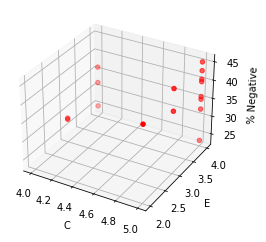

In [507]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = df["C_Coded"]
x2 = df["E_Coded"]
y = df['por_neg']
ax.scatter(x1, x2, y, c='r', marker='o')
# Set axis labels
ax.set_xlabel('C')
ax.set_ylabel('E')
ax.set_zlabel('% Negative')

In [508]:
feature_cols = ['O', 'C', 'E', 'A', 'N']
x = df[feature_cols]
y = df['por_pos']

# follow the usual sklearn pattern: import, instantiate, fit

lm = LinearRegression()
lm.fit(x, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

lm.score(x, y)

90.56462994902108
[ 0.16164674 -1.03826743  0.39186992 -0.48771567 -0.11349544]


0.2791694044115084

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.004713741038308459


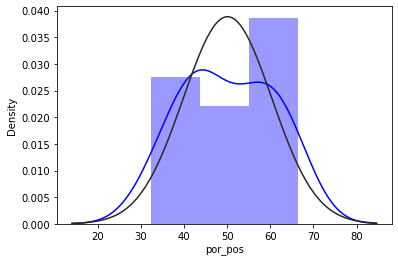

In [509]:
from scipy.stats import norm, skew

sns.distplot(df['por_pos'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['por_pos']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.024635100585398022


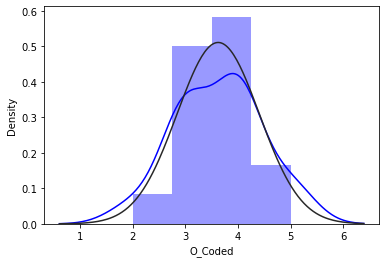

In [510]:
from scipy.stats import norm, skew

sns.distplot(df['O_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['O_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.8090398349558905


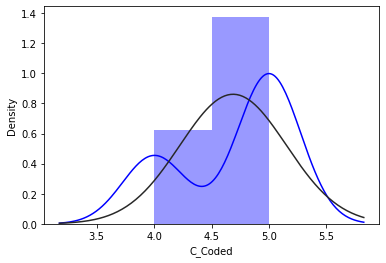

In [511]:
from scipy.stats import norm, skew

sns.distplot(df['C_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['C_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -1.359876613415705


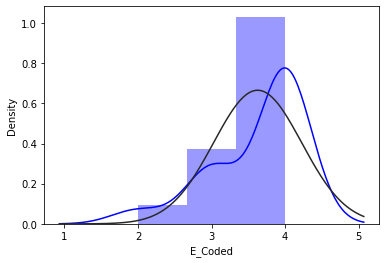

In [512]:
from scipy.stats import norm, skew

sns.distplot(df['E_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['E_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  0.0


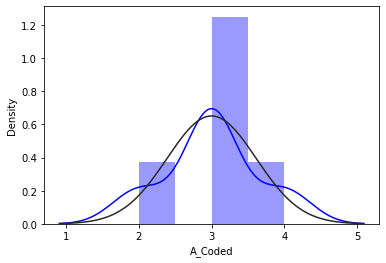

In [513]:
from scipy.stats import norm, skew

sns.distplot(df['A_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['A_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.35380019214382935


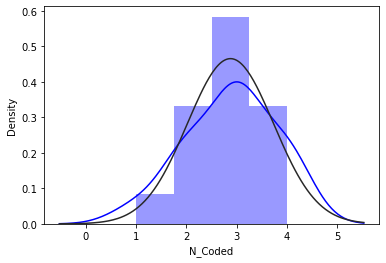

In [514]:
from scipy.stats import norm, skew

sns.distplot(df['N_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['N_Coded']))

In [515]:
print('The skew of this distribution is = ', skew(df['O_Coded']))
print('The skew of this distribution is = ', skew(df['C_Coded']))
print('The skew of this distribution is = ', skew(df['E_Coded']))
print('The skew of this distribution is = ', skew(df['A_Coded']))
print('The skew of this distribution is = ', skew(df['N_Coded']))

The skew of this distribution is =  -0.024635100585398022
The skew of this distribution is =  -0.8090398349558905
The skew of this distribution is =  -1.359876613415705
The skew of this distribution is =  0.0
The skew of this distribution is =  -0.35380019214382935


In [516]:
# df['O_Coded'], lmbda = boxcox(df['O_Coded'])
# df['C_Coded'], lmbda = boxcox(df['C_Coded'])
# df['E_Coded'], lmbda = boxcox(df['E_Coded'])
# df['A_Coded'], lmbda = boxcox(df['A_Coded'])
# df['N_Coded'], lmbda = boxcox(df['N_Coded'])

In [517]:
print('The skew of this distribution is = ', skew(df['O_Coded']))
print('The skew of this distribution is = ', skew(df['C_Coded']))
print('The skew of this distribution is = ', skew(df['E_Coded']))
print('The skew of this distribution is = ', skew(df['A_Coded']))
print('The skew of this distribution is = ', skew(df['N_Coded']))

The skew of this distribution is =  -0.024635100585398022
The skew of this distribution is =  -0.8090398349558905
The skew of this distribution is =  -1.359876613415705
The skew of this distribution is =  0.0
The skew of this distribution is =  -0.35380019214382935


In [518]:
df

,Participant,pos,neu,neg,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,P1,1814,683,2072,39.702342,14.948566,45.349092,37,43,36,24,26,4,5,4,3,3
1,P2,1927,698,1751,44.035649,15.950640,40.013711,41,43,34,22,23,5,5,4,3,3
2,P3,2732,590,2506,46.877145,10.123542,42.999314,43,46,31,24,15,5,5,4,3,2
3,P4,1711,315,678,63.276627,11.649408,25.073964,17,33,33,22,39,2,4,4,3,4
4,P5,3028,422,1967,55.898099,7.790290,36.311612,22,33,31,20,8,3,4,4,2,1
5,P6,5454,755,2984,59.327749,8.212771,32.459480,39,49,39,28,15,4,5,4,3,2
6,P7,821,155,457,57.292394,10.816469,31.891137,35,35,32,26,16,4,4,4,3,2
7,P8,1002,414,794,45.339367,18.733032,35.927602,29,45,34,35,29,3,5,4,4,3
8,P9,4281,650,1520,66.361804,10.075957,23.562238,40,46,38,22,21,4,5,4,3,3
9,P10,2292,304,1962,50.285213,6.669592,43.045195,32,46,19,18,28,4,5,2,2,3


In [519]:
print('The skew of this distribution is = ', skew(df['O_Coded']))
print('The skew of this distribution is = ', skew(df['C_Coded']))
print('The skew of this distribution is = ', skew(df['E_Coded']))
print('The skew of this distribution is = ', skew(df['A_Coded']))
print('The skew of this distribution is = ', skew(df['N_Coded']))

The skew of this distribution is =  -0.024635100585398022
The skew of this distribution is =  -0.8090398349558905
The skew of this distribution is =  -1.359876613415705
The skew of this distribution is =  0.0
The skew of this distribution is =  -0.35380019214382935


In [520]:
pg.normality(df)

,W,pval,normal
pos,0.878574,0.036872,False
neu,0.542971,0.000005,False
neg,0.749895,0.000633,False
por_pos,0.954516,0.564416,True
por_neu,0.867491,0.024900,False
por_neg,0.948865,0.471920,True
O,0.949463,0.481232,True
C,0.868218,0.025544,False
E,0.959798,0.658125,True
A,0.921497,0.178298,True


In [521]:
model = ols('por_pos ~ C_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     4.948
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0252
Time:                        23:12:20   Log-Likelihood:                -55.437
No. Observations:                  16   AIC:                             116.9
Df Residuals:                      13   BIC:                             119.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.5198     22.582      5.337      0.000      71.734     169.306
C_Coded      -12.5381      4.745     -2.642      0.020     -22.790      -2.286
A_Coded       -3.8924      3.592     -1.084      0.298     -11.652       3.867
==============================================================================
Omnibus:                        6.373   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                3.510
Skew:                           1.056   Prob(JB):                        0.173
Kurtosis:                       3.898   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [522]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

# Durbin-Watson test: This is done by comparing the successive error terms to check if they are 
# directly/inversely correlated with each other. Values between 1.5–2.5 would tell us that 
# autocorrelation is not a problem in that predictive model.

# 0–1.5 in the Durbin-Watson test refers to a significant positive correlation while 
# 2.5+ refers to a significantly negative correlation.

1.8870675688427596

In [523]:
feature_cols = ['O', 'C', 'E', 'A', 'N']
X = df[feature_cols]
y = df['por_pos']

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()

results.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.7746
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.589
Time:                        23:12:20   Log-Likelihood:                -57.346
No. Observations:                  16   AIC:                             126.7
Df Residuals:                      10   BIC:                             131.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.5646     29.179      3.104      0.011      25.549     155.580
O              0.1616      0.646      0.250      0.807      -1.278       1.601
C             -1.0383      0.788     -1.317      0.217      -2.795       0.718
E              0.3919      0.579      0.677      0.514      -0.898       1.681
A             -0.4877      0.620     -0.786      0.450      -1.869       0.894
N             -0.1135      0.414     -0.274      0.790      -1.036       0.809
==============================================================================
Omnibus:                        2.636   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.158
Skew:                           0.197   Prob(JB):                        0.560
Kurtosis:                       1.743   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [524]:
feature_cols = ['C', 'E']
X = df[feature_cols]
y = df['por_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  88.21059319389636
COEF:  [-1.45754342  0.65239679]
Score:  0.39614455092400824
Mean Absolute Error: 10.399038389275828
Mean Squared Error: 177.59501005318373
Root Mean Squared Error: 13.326477781213748
                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     2.952
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.103
Time:                        23:12:20   Log-Likelihood:                -42.141
No. Observations:                  12   AIC:                             90.28
Df Residuals:                       9   BIC:                             91.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                     

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [525]:
feature_cols = ['C', 'A']
X = df[feature_cols]
y = df['por_neg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  13.835790208903468
COEF:  [ 0.92128175 -0.60122248]
Score:  0.4724906904430116
Mean Absolute Error: 5.8564346406712335
Mean Squared Error: 96.24749629953581
Root Mean Squared Error: 9.810580833953503
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     4.031
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0562
Time:                        23:12:20   Log-Likelihood:                -35.464
No. Observations:                  12   AIC:                             76.93
Df Residuals:                       9   BIC:                             78.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                       

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [526]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  130.52103623184578
COEF:  [-15.78798367  -2.67502385]
Score:  0.621988974096447
Mean Absolute Error: 7.347784936928109
Mean Squared Error: 135.2444756653303
Root Mean Squared Error: 11.629465837489283
                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     7.404
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0126
Time:                        23:12:20   Log-Likelihood:                -39.331
No. Observations:                  12   AIC:                             84.66
Df Residuals:                       9   BIC:                             86.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                      

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [527]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_neg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

12
4
Intercept :  -7.628405257776571
COEF:  [11.64665677 -3.38667557]
Score:  0.6368064455007892
Mean Absolute Error: 5.298257175410741
Mean Squared Error: 73.84828247376853
Root Mean Squared Error: 8.593502340359752
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     7.890
Date:                Tue, 15 Jun 2021   Prob (F-statistic):             0.0105
Time:                        23:12:20   Log-Likelihood:                -33.224
No. Observations:                  12   AIC:                             72.45
Df Residuals:                       9   BIC:                             73.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                   

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [528]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_neg']

results = []

for n in range(1, 11):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)

    kf = KFold(n_splits=5, shuffle=True)

    lm = LinearRegression()
    # scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    scores = cross_val_score(lm, X_train, y_train, scoring="r2", cv=kf)
#     print(scores)
    # print(sorted(me.SCORERS.keys()))
    # print(np.absolute(np.mean(scores)))
    predictions = cross_val_predict(lm, X_train, y_train, cv=kf)
#     print(predictions)
    accuracy = me.r2_score(y_train, predictions)
    print("Cross-Predicted Accuracy: ", accuracy)
    results.append(accuracy)
    
print(np.mean(results))

Cross-Predicted Accuracy:  -0.11981584454991134
Cross-Predicted Accuracy:  0.24542680972073705
Cross-Predicted Accuracy:  -0.03458461618929798
Cross-Predicted Accuracy:  -0.08467196571165791
Cross-Predicted Accuracy:  0.12076932857129463
Cross-Predicted Accuracy:  0.2838144873954441
Cross-Predicted Accuracy:  0.6214556344771082
Cross-Predicted Accuracy:  -0.11065092960195155
Cross-Predicted Accuracy:  -0.06041160627273445
Cross-Predicted Accuracy:  0.06078213119614406
0.09221134290351748


In [529]:
predictions = cross_val_predict(lm, X_train, y_train, cv=5)
predictions

array([28.45050134, 41.53838604, 24.53080928, 38.9401799 , 36.61187582,
       38.9401799 , 36.16909067, 39.18817565, 38.42597843, 31.57076945,
       38.03584803, 40.02415786])

In [530]:
accuracy = me.r2_score(y_train, predictions)
print("Cross-Predicted Accuracy: ", accuracy)

Cross-Predicted Accuracy:  0.017443632918884178


In [531]:
X.loc[3]

C_Coded    4
A_Coded    3
Name: 3, dtype: int64

In [532]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_pos']

kf = KFold(n_splits=5, random_state=1, shuffle=True)

scores = []

for train_index, test_index in kf.split(X):
#         print("Train:", train_index, "Validation:",test_index)
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)

#         print("Intercept : ", regressor.intercept_)
#         print("COEF: ", regressor.coef_)
#         print("Score: ", regressor.score(X_train, y_train))
#         print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
#         print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
#         print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))
        scores.append(regressor.score(X_train, y_train))
    
print(np.mean(scores))

0.44351080199684106


In [533]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_pos']

# evaluate a model with a given number of repeats
def evaluate_model(X_train, y_train, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
    # create model
    model = LinearRegression()
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    print(scores)
    return scores

# configurations to test
repeats = range(1,6)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scores = evaluate_model(X_train, y_train, r)
    # summarize
#     print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), stats.sem(scores)))
    # store
    results.append(np.mean(scores))
    
print(np.mean(results))

[  0.84921003 -10.89667155 -40.27769524  -2.98113704   0.54583485]
[  0.84921003 -10.89667155 -40.27769524  -2.98113704   0.54583485
   0.06560892  -0.20202255 -13.90177534   0.6830919    0.90545911]
[  0.84921003 -10.89667155 -40.27769524  -2.98113704   0.54583485
   0.06560892  -0.20202255 -13.90177534   0.6830919    0.90545911
  -2.56873084   0.20804976  -2.24780204  -5.55774313   0.6830919 ]
[ 8.49210033e-01 -1.08966716e+01 -4.02776952e+01 -2.98113704e+00
  5.45834847e-01  6.56089203e-02 -2.02022548e-01 -1.39017753e+01
  6.83091904e-01  9.05459108e-01 -2.56873084e+00  2.08049765e-01
 -2.24780204e+00 -5.55774313e+00  6.83091904e-01  4.67642326e-01
  3.78313083e-01 -1.38544782e+00 -2.28680534e-01  5.07049452e-03]
[ 8.49210033e-01 -1.08966716e+01 -4.02776952e+01 -2.98113704e+00
  5.45834847e-01  6.56089203e-02 -2.02022548e-01 -1.39017753e+01
  6.83091904e-01  9.05459108e-01 -2.56873084e+00  2.08049765e-01
 -2.24780204e+00 -5.55774313e+00  6.83091904e-01  4.67642326e-01
  3.78313083e-0